# spam detection using machine learning

Import libraries

In [1]:
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd

Reading data from dataset

In [3]:
df= pd.read_csv('c:/users/lenovo/spam detection/spam.csv',encoding='ISO-8859-1')
#le=LabelEncoder() 
#converting the labels into numeric form so as to convert it into the machine-readable form
#sep='\t',header=None, names=['SMS', 'label']

Data preprocessing

In [4]:
df.shape

(5572, 5)

In [5]:
#original document
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [7]:
#rename column name
df.rename(columns={'v1':'label','v2':'message'},inplace=True) 
#inplace for data is modified in dataset

In [8]:
df

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
#remove unwanted colunmes 
df.drop('Unnamed: 2',inplace=True,axis=1)
df.drop('Unnamed: 3',inplace=True,axis=1)
df.drop('Unnamed: 4',inplace=True,axis=1)
#axis=1 represents columns
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
pd.set_option("display.max_colwidth",150)
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT..."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [11]:
#show number of missing(NAN,na) data for each column
df.isnull().sum()

label      0
message    0
dtype: int64

In [12]:
data=df.to_numpy()
#print(data)

In [13]:
X=data[:,1] #exclude label column
y=data[:,0] #exclude message column
#y for output and X for input

In [14]:
tokenizer=RegexpTokenizer('\w+')   
sw=set(stopwords.words('english'))
ps=PorterStemmer()

In [15]:
#getCleanreview
def getStem(review):
    review=review.lower()
    tokens=tokenizer.tokenize(review) #breaking into small words
    removed_stopwords=[w for w in tokens if w not in sw]
    stemmed_words=[ps.stem(token)for token in removed_stopwords]
    clean_review=' '.join(stemmed_words)
    return clean_review

In [16]:
#get a clean doc
def getDoc(document):
    d=[]
    for doc in document:
        d.append(getStem(doc))
    return d

In [17]:
stemmed_doc=getDoc(X)

In [18]:
cv=CountVectorizer()
# feature extraction

In [19]:
# create my vocab
vc=cv.fit_transform(stemmed_doc)

In [20]:
X=vc.toarray() 

split dataset into train/test

In [21]:

X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

Evaluation of model

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
model=MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.977705274605764

In [24]:
messages=[
    """
   
Hello Madhuri Shriniwar ,
Achieving success is easy with smart steps! 
We have some simple & smart steps for you to effortlessly proceed further with AI-for-India. 

One such step is to “Join our Telegram Channel” to keep you updated with our latest notifications & remind you accordingly for best learning experience on the AI-for-India online event. Also, don’t miss some exciting notifications like - Refer more & Earn more program, where you can win Netflix subscriptions, iPad, & even iPhone 12 just by sharing about ‘AI-for-India’ with your friends & social circle. Why are you even waiting?

Follow our Telegram Channel for more such rewarding notifications & updates.


    """
]

In [25]:
def prepare(messages):
    d = getDoc(messages)
    # dont do fit_transform!! it will create new vocab.
    return cv.transform(d)

messages = prepare(messages)

In [26]:
y_pred = model.predict(messages)
y_pred

array(['ham'], dtype='<U4')

In [27]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3238
        spam       0.99      0.97      0.98       495

    accuracy                           0.99      3733
   macro avg       0.99      0.98      0.99      3733
weighted avg       0.99      0.99      0.99      3733

Confusion Matrix: 
 [[3231    7]
 [  15  480]]

Accuracy:  0.994106616662202


In [28]:
#Evaluate the model on the test data set
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = model.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy:\n ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1587
        spam       0.92      0.92      0.92       252

    accuracy                           0.98      1839
   macro avg       0.95      0.95      0.95      1839
weighted avg       0.98      0.98      0.98      1839

Confusion Matrix: 
 [[1566   21]
 [  20  232]]

Accuracy:
  0.977705274605764


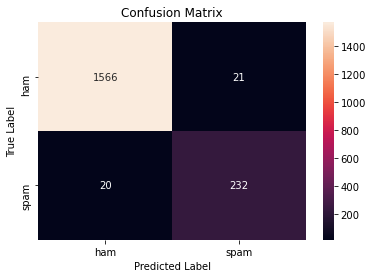

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

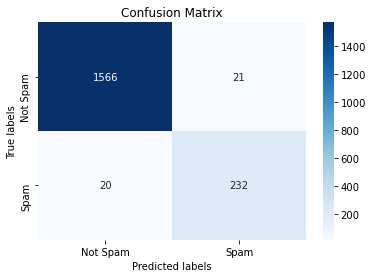

In [30]:
#confusion matrix using seaborn

import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(df_cm, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);